# Plots

this notebook is used to plot different stuff that does not fit into other notebooks...

In [22]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("..")

## Problem statement

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
import matplotlib as mpl
sns.set()
mpl.style.use('default')

In [3]:
import yfinance as yf

In [4]:
# Define the stock symbol and date range
stock_symbol = "AAPL"  # Apple's stock symbol
start_date = "2020-01-01"
end_date = "2021-01-01"

In [5]:
apple_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()

In [24]:
df = apple_data

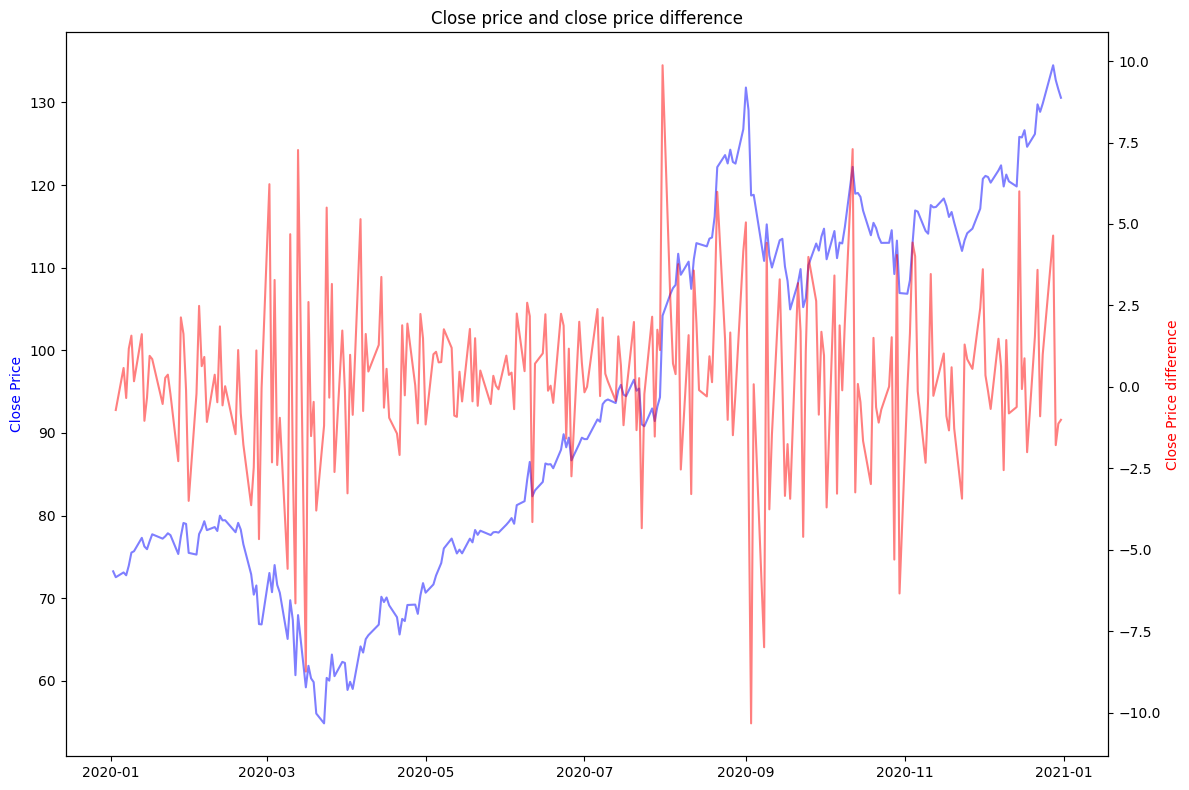

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8))

ax = plt.subplot(1, 1, 1)
plt.plot(df['Adj Close'], color='blue', alpha=0.5)
plt.title('Close price and close price difference')
plt.ylabel('Close Price', color='blue')
ax2 = ax.twinx()
ax2.plot(df['Adj Close'].diff(), color='red', alpha=0.5)
ax2.set_ylabel('Close Price difference', color='red')
plt.tight_layout()
plt.savefig('../tex/Figures/etc/apple_time_series.pdf')
plt.show();

### outliers

In [60]:
def get_outliers(g, prop_outliers, outliers_range):
    x = g["value"].to_numpy().copy()
    g["original_value"] = g["value"]

    outliers_pos = np.random.choice(len(x), size=int(len(x) * prop_outliers))

    rets_outliers = np.random.uniform(size=outliers_pos.shape[0], low=-outliers_range, high=outliers_range)

    x[outliers_pos] += rets_outliers * x[outliers_pos]

    g["target"] = 0
    g.iloc[outliers_pos, -1] = 1

    g["value"] = x
    return g

In [120]:
def plot_outliers(g, desc="", save=True):
    x = g["original_value"].to_numpy()
    r = g["value"].to_numpy()
    outliers_pos = np.where(g["target"].to_numpy())[0]
    
    # visually check
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(f"{desc}")
    plt.subplot(2, 2, 1)
    g_outlier = g.query('target == 1')
    plt.plot(g['original_value'], label="Original time series", zorder=0, alpha=0.5)
    plt.plot(g['value'], label="Time series with outliers", zorder=0, alpha=0.5)
    plt.scatter(g_outlier.index, y=g_outlier['value'], label='outlier', color="red", s=2, zorder=1)
    plt.legend()
    
    plt.subplot(2, 2, 2)
    bins = plt.hist(x, bins=30, alpha=0.5)[1]
    plt.hist(r, bins=bins, alpha=0.5)
    plt.yscale("log")
    
    plt.subplot(2, 2, 3)
    g_diff = g.copy()
    g_diff['orig_diff'] = g_diff['original_value'].diff()
    g_diff['diff'] = g_diff['value'].diff()
    g_outlier_diff = g_diff.query('target == 1')
    
    plt.plot(g_diff['orig_diff'], label="Original time series", zorder=0, alpha=0.5)
    plt.plot(g_diff['diff'], label="Time series with outliers", zorder=0, alpha=0.5)
    plt.scatter(g_outlier_diff.index, y=g_outlier_diff['diff'], label='outlier', color="red", s=2, zorder=1)
    
    plt.subplot(2, 2, 4)
    bins = plt.hist(np.diff(x), bins=30, alpha=0.5)[1]
    plt.hist(np.diff(r), bins=bins, alpha=0.5)
    plt.yscale("log")

    plt.tight_layout()
    if save:
        plt.savefig(f"../tex/Figures/etc/apple_outliers.pdf")
        plt.show()
        plt.close()
    else:
        plt.show()

In [121]:
df['value'] = df['Adj Close']

In [122]:
# plt.hist(df['value'])[1];

In [123]:
prop_outliers = 0.05
outliers_range = 0.5

np.random.seed(1)
df = get_outliers(df, prop_outliers=prop_outliers, outliers_range=outliers_range)

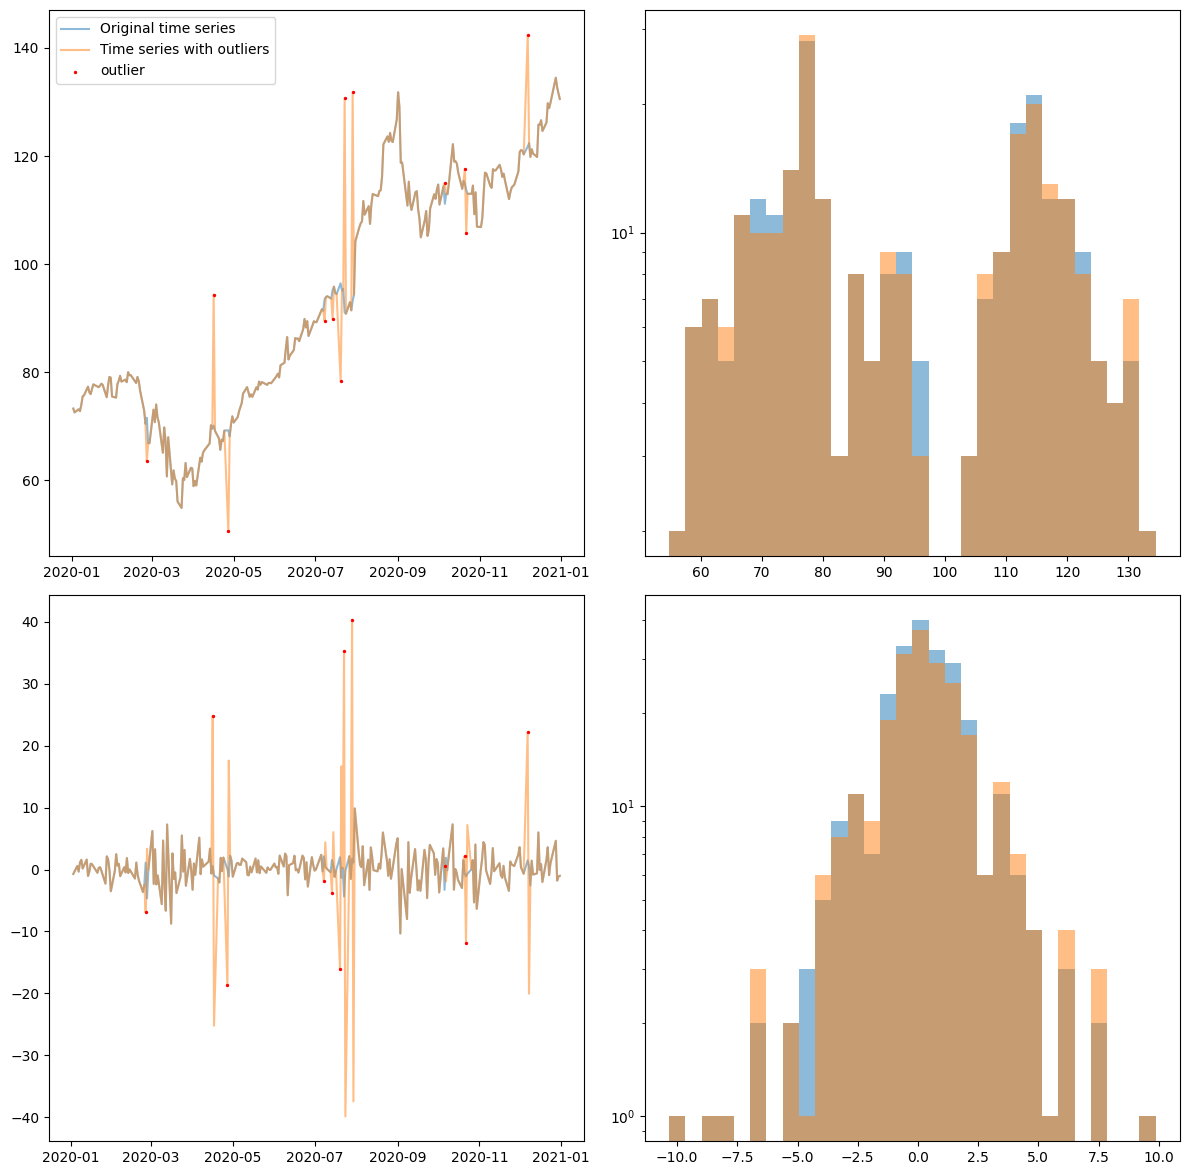

In [124]:
desc = ''
plot_outliers(df, desc, save=True)